<a href="https://colab.research.google.com/github/eith010/ANN_HW1/blob/main/HW1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Connect to Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
%cd /gdrive/My Drive/

/gdrive/My Drive


### Import libraries

In [3]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.7.0


### Set seed for reproducibility

In [4]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

#Data

In [5]:
labels = {
    0:'Apple', 
    1:'Blueberry', 
    2:'Cherry', 
    3:'Corn', 
    4:'Grape', 
    5:'Orange', 
    6:'Peach', 
    7:'Pepper', 
    8:'Potato', 
    9:'Raspberry',
    10:'Soybean', 
    11:'Squash', 
    12:'Strawberry', 
    13:'Tomato', 
}

In [6]:
%ls Leaves_dataset/

training/


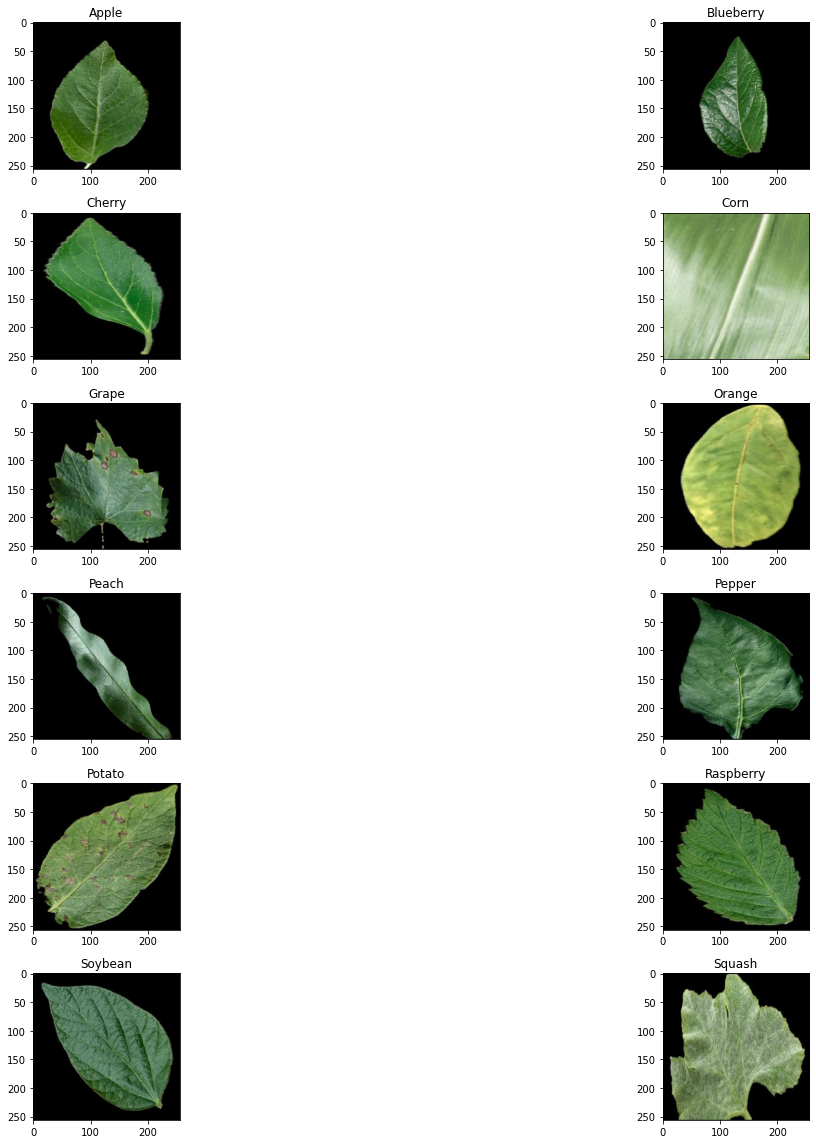

In [21]:
num_row = 6
num_col = 2
fig, axes = plt.subplots(num_row, num_col, figsize=(4*num_row,8*num_col))
for i in range(num_row*num_col):
  if i < 14:
    class_imgs = next(os.walk('Leaves_dataset/training/{}/'.format(labels[i])))[2]
    class_img = class_imgs[0]
    img = Image.open('Leaves_dataset/training/{}/{}'.format(labels[i], class_img))
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(img))
    ax.set_title('{}'.format(labels[i]))
plt.tight_layout()
plt.show()

#Loading Data 

In [22]:
dataset_dir= 'Leaves_dataset/training/'

In [23]:
# Inspect dataset structure on disk
print("Depth 0 (Leaves_dataset)")
print("-------")
!ls Leaves_dataset
print()
print("Depth 1 (e.g., Leaves_dataset/training)")
print("------------------------")
!ls Leaves_dataset/training
print()
print("Depth 2 (e.g., Leaves_dataset/training/Apple)")
print("----------------------------")
!ls Leaves_dataset/training/Apple

Depth 0 (Leaves_dataset)
-------
training

Depth 1 (e.g., Leaves_dataset/training)
------------------------
Apple	   Cherry  Grape   Peach   Potato     Soybean  Strawberry
Blueberry  Corn    Orange  Pepper  Raspberry  Squash   Tomato

Depth 2 (e.g., Leaves_dataset/training/Apple)
----------------------------
00001.jpg  00182.jpg  00355.jpg  00537.jpg  22499.jpg  22682.jpg  22855.jpg
00003.jpg  00183.jpg  00357.jpg  00538.jpg  22501.jpg  22683.jpg  22856.jpg
00004.jpg  00184.jpg  00358.jpg  00539.jpg  22502.jpg  22684.jpg  22857.jpg
00005.jpg  00185.jpg  00359.jpg  00540.jpg  22504.jpg  22685.jpg  22858.jpg
00006.jpg  00186.jpg  00360.jpg  00543.jpg  22505.jpg  22686.jpg  22859.jpg
00007.jpg  00187.jpg  00361.jpg  00544.jpg  22506.jpg  22687.jpg  22860.jpg
00008.jpg  00188.jpg  00362.jpg  00545.jpg  22507.jpg  22688.jpg  22861.jpg
00009.jpg  00189.jpg  00363.jpg  00546.jpg  22509.jpg  22690.jpg  22862.jpg
00011.jpg  00192.jpg  00364.jpg  00547.jpg  22510.jpg  22691.jpg  22863.jpg
00012.

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rescale=1/255.,validation_split=0.2)    

train_gen = image_generator.flow_from_directory(
                                                 directory=dataset_dir,
                                                 target_size=(256,256),
                                                 color_mode='rgb',
                                                 classes=None, # can be set to labels
                                                 class_mode='categorical',
                                                 batch_size=8,
                                                 shuffle=True,
                                                 seed=seed,
                                                 subset="training"
                                                 )

validation_gen = image_generator.flow_from_directory( 
                                                 directory=dataset_dir,
                                                 target_size=(256,256),
                                                 color_mode='rgb',
                                                 classes=None, # can be set to labels
                                                 class_mode='categorical',
                                                 batch_size=8,
                                                 shuffle=True,
                                                 seed=seed,
                                                 subset="validation"
                                                 )

Found 14189 images belonging to 14 classes.
Found 3539 images belonging to 14 classes.


In [25]:
print("Assigned labels")
print(train_gen.class_indices)
print()
print("Target classes")
print(train_gen.classes)

Assigned labels
{'Apple': 0, 'Blueberry': 1, 'Cherry': 2, 'Corn': 3, 'Grape': 4, 'Orange': 5, 'Peach': 6, 'Pepper': 7, 'Potato': 8, 'Raspberry': 9, 'Soybean': 10, 'Squash': 11, 'Strawberry': 12, 'Tomato': 13}

Target classes
[ 0  0  0 ... 13 13 13]


In [26]:
def get_next_batch(generator):
  batch = next(generator)

  image = batch[0]
  target = batch[1]

  print("(Input) image shape:", image.shape)
  print("Target shape:",target.shape)

  # Visualize only the first sample
  image = image[0]
  target = target[0]
  target_idx = np.argmax(target)
  print()
  print("Categorical label:", target)
  print("Label:", target_idx)
  print("Class name:", labels[target_idx])
  fig = plt.figure(figsize=(6, 4))
  plt.imshow(np.uint8(image))

  return batch

(Input) image shape: (8, 256, 256, 3)
Target shape: (8, 14)

Categorical label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Label: 6
Class name: Peach


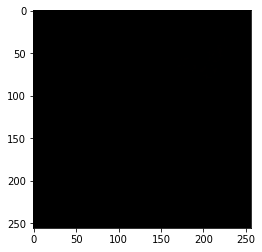

In [27]:
# Get a sample from dataset and show info
_ = get_next_batch(train_gen)

### Process data

### Models metadata

In [28]:
input_shape = (256, 256, 3)
epochs = 100

### Standard model

In [29]:
def build_model(input_shape):

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    resize_layer = tfkl.Resizing(64, 64, interpolation="bicubic")(input_layer)

    conv1 = tfkl.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name = 'Conv1')(resize_layer)
    pool1 = tfkl.MaxPooling2D(name = 'Pool1')(conv1)

    conv2 = tfkl.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name = 'Conv2')(pool1)
    pool2 = tfkl.MaxPooling2D(name = 'Pool2')(conv2)

    conv3 = tfkl.Conv2D(
        filters=256,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name = 'Conv3')(pool2)
    glob_pooling = tfkl.GlobalAveragePooling2D(name='GloablPooling')(conv3)
    glob_pooling = tfkl.Dropout(0.3, seed=seed, name='GloablPoolingDropout')(glob_pooling)

    classifier_layer = tfkl.Dense(
        units=256,  
        activation='relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name='Classifier')(glob_pooling)
    classifier_layer = tfkl.Dropout(0.3, seed=seed, name='ClassifierDropout')(classifier_layer)

    output_layer = tfkl.Dense(
        units=14, 
        activation='softmax', 
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name='Output')(classifier_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256, 256, 3)]     0         
                                                                 
 resizing_1 (Resizing)       (None, 64, 64, 3)         0         
                                                                 
 Conv1 (Conv2D)              (None, 64, 64, 64)        1792      
                                                                 
 Pool1 (MaxPooling2D)        (None, 32, 32, 64)        0         
                                                                 
 Conv2 (Conv2D)              (None, 32, 32, 128)       73856     
                                                                 
 Pool2 (MaxPooling2D)        (None, 16, 16, 128)       0         
                                                                 
 Conv3 (Conv2D)              (None, 16, 16, 256)       295168

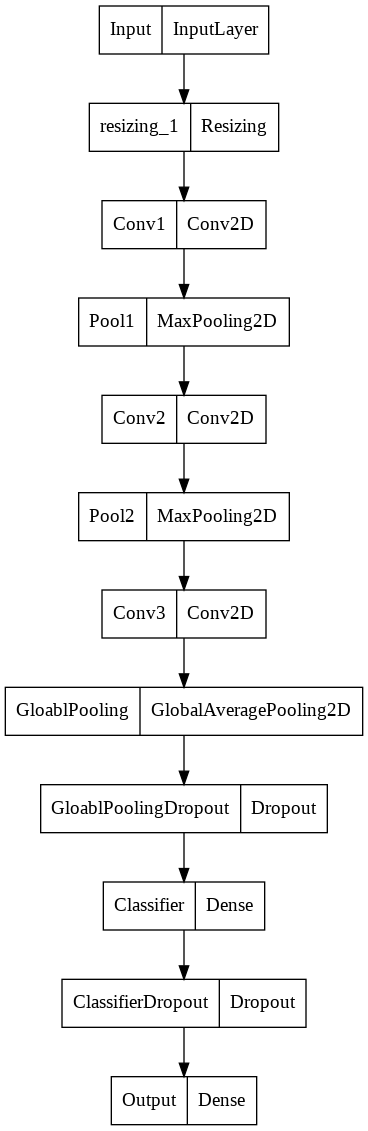

In [30]:
standard_model = build_model(input_shape)
standard_model.summary()
tfk.utils.plot_model(standard_model)

In [31]:
# Utility function to create folders and callbacks for training
from datetime import datetime

def create_folders_and_callbacks(model_name):

  exps_dir = os.path.join('hw1_experiments')
  if not os.path.exists(exps_dir):
      os.makedirs(exps_dir)

  now = datetime.now().strftime('%b%d_%H-%M-%S')

  exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
  if not os.path.exists(exp_dir):
      os.makedirs(exp_dir)
      
  callbacks = []

  # Model checkpoint
  # ----------------
  ckpt_dir = os.path.join(exp_dir, 'ckpts')
  if not os.path.exists(ckpt_dir):
      os.makedirs(ckpt_dir)

  ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp.ckpt'), 
                                                     save_weights_only=False, # True to save only weights
                                                     save_best_only=False) # True to save only the best epoch 
  callbacks.append(ckpt_callback)

  # Visualize Learning on Tensorboard
  # ---------------------------------
  tb_dir = os.path.join(exp_dir, 'tb_logs')
  if not os.path.exists(tb_dir):
      os.makedirs(tb_dir)
      
  # By default shows losses and metrics for both training and validation
  tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir, 
                                               profile_batch=0,
                                               histogram_freq=1)  # if > 0 (epochs) shows weights histograms
  callbacks.append(tb_callback)

  # Early Stopping
  # --------------
  es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
  callbacks.append(es_callback)

  return callbacks

In [35]:
# Create folders and callbacks and fit
standardm_callbacks = create_folders_and_callbacks(model_name='standard_model')

# Train the model
history = standard_model.fit(
    x = train_gen,
    epochs = epochs,
    validation_data = validation_gen,
    callbacks = standardm_callbacks,
).history

Epoch 1/100
1774/1774 [==============================] - ETA: 0s - loss: 1.7703 - accuracy: 0.4577

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 2170s 1s/step - loss: 1.7703 - accuracy: 0.4577 - val_loss: 1.1963 - val_accuracy: 0.6202
Epoch 2/100
1774/1774 [==============================] - ETA: 0s - loss: 1.0198 - accuracy: 0.6661

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 425s 240ms/step - loss: 1.0198 - accuracy: 0.6661 - val_loss: 0.8805 - val_accuracy: 0.7253
Epoch 3/100
1774/1774 [==============================] - ETA: 0s - loss: 0.7051 - accuracy: 0.7731

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 420s 237ms/step - loss: 0.7051 - accuracy: 0.7731 - val_loss: 0.7105 - val_accuracy: 0.7768
Epoch 4/100
1774/1774 [==============================] - ETA: 0s - loss: 0.5388 - accuracy: 0.8271

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 414s 233ms/step - loss: 0.5388 - accuracy: 0.8271 - val_loss: 0.4892 - val_accuracy: 0.8474
Epoch 5/100
1774/1774 [==============================] - ETA: 0s - loss: 0.4337 - accuracy: 0.8596

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 424s 239ms/step - loss: 0.4337 - accuracy: 0.8596 - val_loss: 0.4553 - val_accuracy: 0.8663
Epoch 6/100
1774/1774 [==============================] - ETA: 0s - loss: 0.3612 - accuracy: 0.8854

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 416s 235ms/step - loss: 0.3612 - accuracy: 0.8854 - val_loss: 0.3954 - val_accuracy: 0.8827
Epoch 7/100
1774/1774 [==============================] - ETA: 0s - loss: 0.3033 - accuracy: 0.9044

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 418s 236ms/step - loss: 0.3033 - accuracy: 0.9044 - val_loss: 0.2955 - val_accuracy: 0.8994
Epoch 8/100
1774/1774 [==============================] - ETA: 0s - loss: 0.2735 - accuracy: 0.9118

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 421s 237ms/step - loss: 0.2735 - accuracy: 0.9118 - val_loss: 0.2655 - val_accuracy: 0.9161
Epoch 9/100
1774/1774 [==============================] - ETA: 0s - loss: 0.2288 - accuracy: 0.9268

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 425s 239ms/step - loss: 0.2288 - accuracy: 0.9268 - val_loss: 0.4209 - val_accuracy: 0.8935
Epoch 10/100
1774/1774 [==============================] - ETA: 0s - loss: 0.2075 - accuracy: 0.9325

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 423s 238ms/step - loss: 0.2075 - accuracy: 0.9325 - val_loss: 0.3019 - val_accuracy: 0.9127
Epoch 11/100
1774/1774 [==============================] - ETA: 0s - loss: 0.1835 - accuracy: 0.9397

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 416s 235ms/step - loss: 0.1835 - accuracy: 0.9397 - val_loss: 0.2889 - val_accuracy: 0.9164
Epoch 12/100
1774/1774 [==============================] - ETA: 0s - loss: 0.1715 - accuracy: 0.9455

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 416s 234ms/step - loss: 0.1715 - accuracy: 0.9455 - val_loss: 0.2737 - val_accuracy: 0.9169
Epoch 13/100
1774/1774 [==============================] - ETA: 0s - loss: 0.1538 - accuracy: 0.9499

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 417s 235ms/step - loss: 0.1538 - accuracy: 0.9499 - val_loss: 0.2341 - val_accuracy: 0.9277
Epoch 14/100
1774/1774 [==============================] - ETA: 0s - loss: 0.1430 - accuracy: 0.9529

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 414s 233ms/step - loss: 0.1430 - accuracy: 0.9529 - val_loss: 0.1924 - val_accuracy: 0.9409
Epoch 15/100
1774/1774 [==============================] - ETA: 0s - loss: 0.1268 - accuracy: 0.9576

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 429s 242ms/step - loss: 0.1268 - accuracy: 0.9576 - val_loss: 0.4114 - val_accuracy: 0.9036
Epoch 16/100
1774/1774 [==============================] - ETA: 0s - loss: 0.1236 - accuracy: 0.9604

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 415s 234ms/step - loss: 0.1236 - accuracy: 0.9604 - val_loss: 0.4148 - val_accuracy: 0.8926
Epoch 17/100
1774/1774 [==============================] - ETA: 0s - loss: 0.1044 - accuracy: 0.9642

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 416s 235ms/step - loss: 0.1044 - accuracy: 0.9642 - val_loss: 0.2818 - val_accuracy: 0.9198
Epoch 18/100
1774/1774 [==============================] - ETA: 0s - loss: 0.1020 - accuracy: 0.9662

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 423s 239ms/step - loss: 0.1020 - accuracy: 0.9662 - val_loss: 0.2613 - val_accuracy: 0.9279
Epoch 19/100
1774/1774 [==============================] - ETA: 0s - loss: 0.0974 - accuracy: 0.9688

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 424s 239ms/step - loss: 0.0974 - accuracy: 0.9688 - val_loss: 0.8585 - val_accuracy: 0.8443
Epoch 20/100
1774/1774 [==============================] - ETA: 0s - loss: 0.0943 - accuracy: 0.9696

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 414s 233ms/step - loss: 0.0943 - accuracy: 0.9696 - val_loss: 0.3293 - val_accuracy: 0.9127
Epoch 21/100
1774/1774 [==============================] - ETA: 0s - loss: 0.0857 - accuracy: 0.9717

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 424s 239ms/step - loss: 0.0857 - accuracy: 0.9717 - val_loss: 0.2204 - val_accuracy: 0.9404
Epoch 22/100
1774/1774 [==============================] - ETA: 0s - loss: 0.0796 - accuracy: 0.9729

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 422s 238ms/step - loss: 0.0796 - accuracy: 0.9729 - val_loss: 0.2223 - val_accuracy: 0.9412
Epoch 23/100
1774/1774 [==============================] - ETA: 0s - loss: 0.0752 - accuracy: 0.9761

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 425s 239ms/step - loss: 0.0752 - accuracy: 0.9761 - val_loss: 0.2946 - val_accuracy: 0.9237
Epoch 24/100
1774/1774 [==============================] - ETA: 0s - loss: 0.0776 - accuracy: 0.9753

INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


INFO:tensorflow:Assets written to: hw1_experiments/standard_model_Nov24_17-27-39/ckpts/cp.ckpt/assets


1774/1774 [==============================] - 417s 235ms/step - loss: 0.0776 - accuracy: 0.9753 - val_loss: 0.2752 - val_accuracy: 0.9327


In [37]:
# Save best epoch model
standard_model.save("hw1_experiments/StandardModel_Best")

INFO:tensorflow:Assets written to: hw1_experiments/StandardModel_Best/assets


INFO:tensorflow:Assets written to: hw1_experiments/StandardModel_Best/assets


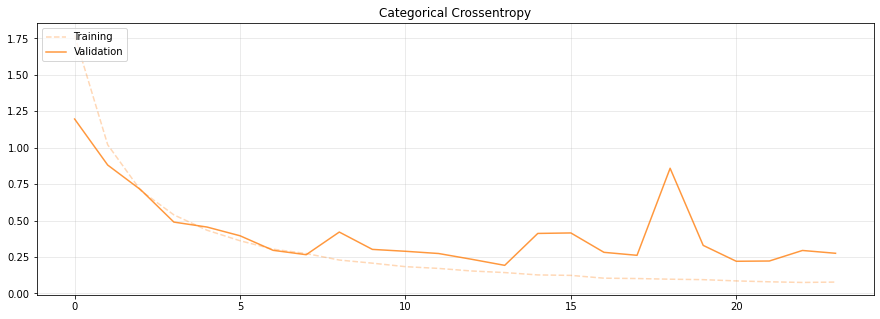

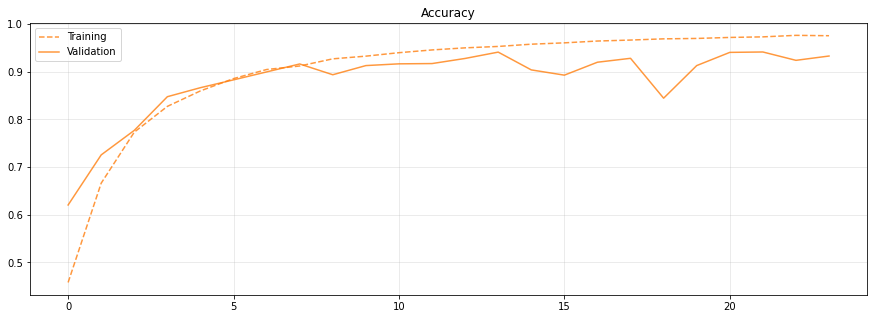

In [39]:
# Plot the training
plt.figure(figsize=(15,5))
plt.plot(history['loss'], label='Training', alpha=.3, color='#ff7f0e', linestyle='--')
plt.plot(history['val_loss'], label='Validation', alpha=.8, color='#ff7f0e')
plt.legend(loc='upper left')
plt.title('Categorical Crossentropy')
plt.grid(alpha=.3)

plt.figure(figsize=(15,5))
plt.plot(history['accuracy'], label='Training', alpha=.8, color='#ff7f0e', linestyle='--')
plt.plot(history['val_accuracy'], label='Validation', alpha=.8, color='#ff7f0e')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=.3)

plt.show()